In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [309]:
data_location = 'TCGA_GBM_LGG_Mutations_all.csv'

In [310]:
df = pd.read_csv(data_location)

In [311]:
data = df.values
#making another copy of the data to store our edited values
data2 = df.values
# making another copy to store rounded ages
data_roundedages = df.values

In [312]:
print(data)

[['LGG' 'TCGA-LGG' 'TCGA-DU-8164' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']
 ['LGG' 'TCGA-LGG' 'TCGA-QH-A6CY' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']
 ['LGG' 'TCGA-LGG' 'TCGA-HW-A5KM' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']
 ...
 ['GBM' 'TCGA-GBM' 'TCGA-28-1746' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']
 ['GBM' 'TCGA-GBM' 'TCGA-32-2491' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']
 ['GBM' 'TCGA-GBM' 'TCGA-06-2557' ... 'NOT_MUTATED' 'NOT_MUTATED'
  'NOT_MUTATED']]


In [313]:
#print(data[0])
#printing the results of patient 1

In [314]:
#print(data[:, 4])
#printing column 5

# figuring out how to convert string of the age to numbers
trial = data[0, 4]
trialarray = trial.split()
#making the age from str to int
age1 = int(trialarray[0])+int(trialarray[2])/365
#rounding the age
age1 = round(age1, 3)
print(age1)

In [315]:
for i in range(len(data[:,4])):
    trial = data[i, 4]
    trialarray = trial.split()
    #making the age from str to int (had to remove decimal because not all have it)
    #patient 42, 438, 672, 707 and 795 dont have the info, so gonna remove them
    if i != 41 and i != 437 and i != 671 and i != 706 and i != 794:
        age1 = int(trialarray[0])
        age1 = round(age1, 3)
    else:
        age1 = 50
    data2[i, 4] = age1
#print(data2[:,4])
    # editing the data array with the new ages (in integer format)
    # note to self: if this reruns, it will try to rewrite the integer, and there WILL be errors

In [316]:
## Time to figure out how to represent mutated and not mutated in integer value!!!

In [317]:
for k in range(7, 27):
    for i in range(len(data[:,k])):
        trial = data[i, k]
        if trial == "MUTATED":
            data2[i, k] = 1
        else:
            data2[i, k] = 0
    #print(data2[:,k])
    # editing the data array with the new ages (in integer format)
    # note to self: if this reruns, it will try to rewrite the integer, and there WILL be errors

In [318]:
#### Need to repeat this for the other columns, see if there's a quicker way

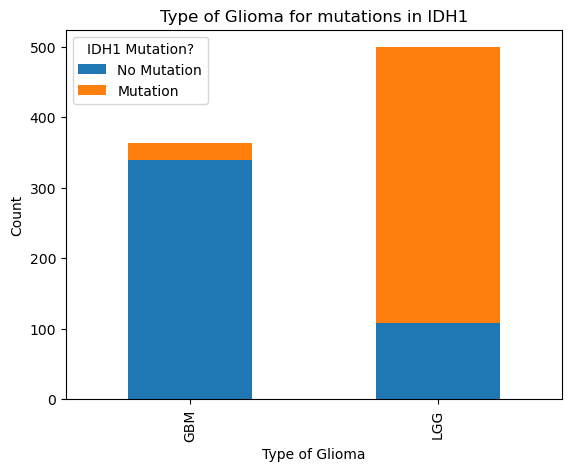

In [319]:
count_data = df.groupby([(data2[:, 0]), (data2[:, 7])]).size().unstack()

ax = count_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Type of Glioma')
plt.ylabel('Count')
plt.title('Type of Glioma for mutations in IDH1')
legend_labels = ['No Mutation', 'Mutation']
ax.legend(legend_labels, title='IDH1 Mutation?')

# Display the plot
plt.show()

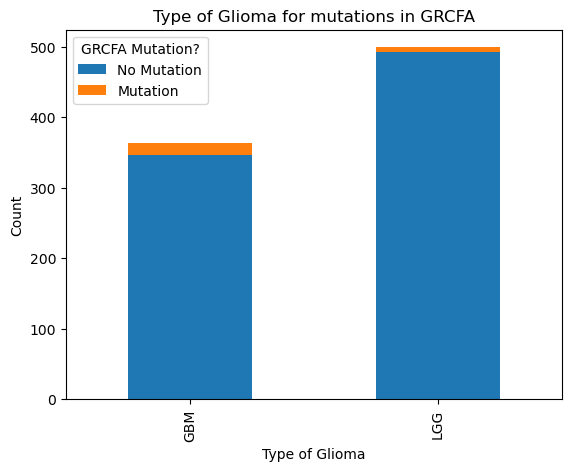

In [320]:
count_data = df.groupby([(data2[:, 0]), (data2[:, 26])]).size().unstack()

ax = count_data.plot(kind='bar', stacked=True)

# Making pretty
plt.xlabel('Type of Glioma')
plt.ylabel('Count')
plt.title('Type of Glioma for mutations in GRCFA')
legend_labels = ['No Mutation', 'Mutation']
ax.legend(legend_labels, title='GRCFA Mutation?')

# Display the plot
plt.show()

Ongoing questions: 
how to represent race and type of diagnosis

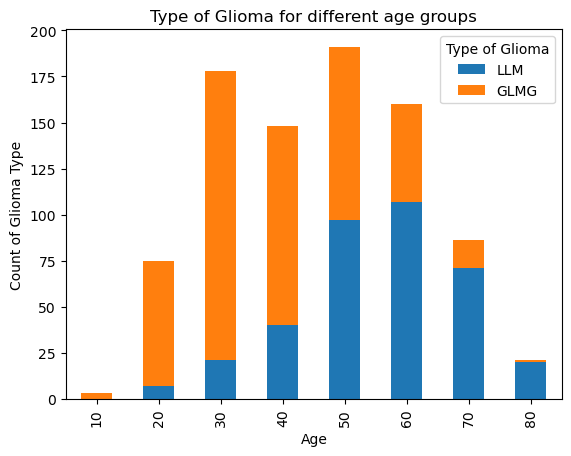

In [321]:
###### Rounding ages to groups
for i in range(len(data2[:,4])):
    trial = data2[i, 4]
    if i != 41 and i != 437 and i != 671 and i != 706 and i != 794:
        age1 = int(trial/10)
        age1 = age1*10
    else:
        age1 = 50
    data2[i, 4] = age1
#print(data2[:,4])
    # editing the data array with the new ages (in integer format)
    # note to self: if this reruns, it will try to rewrite the integer, and there WILL be errors
    
count_data = df.groupby([(data2[:, 4]), (data2[:, 0])]).size().unstack()

ax = count_data.plot(kind='bar', stacked=True)

# Making pretty
plt.title('Type of Glioma for different age groups')
plt.xlabel('Age')
plt.ylabel('Count of Glioma Type')
legend_labels = ['LLM', 'GLMG']
ax.legend(legend_labels, title='Type of Glioma')

# Display the plot
plt.show()

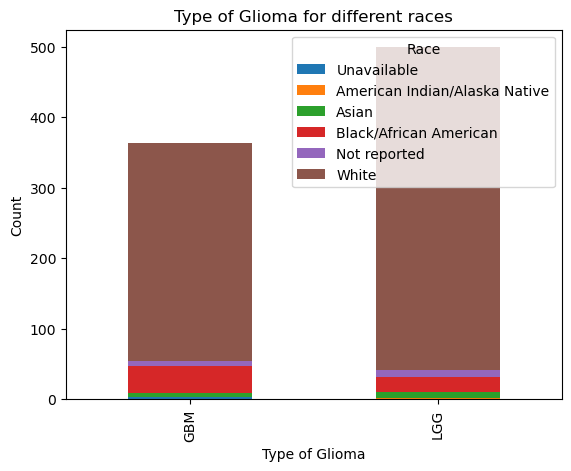

In [322]:
count_data = df.groupby([(data2[:, 0]), (data2[:, 6])]).size().unstack()

ax = count_data.plot(kind='bar', stacked=True)

# Making pretty
plt.xlabel('Type of Glioma')
plt.ylabel('Count')
plt.title('Type of Glioma for different races')

race_legend = ['Unavailable', 'American Indian/Alaska Native', 'Asian', 'Black/African American', 'Not reported', 'White']
ax.legend(race_legend, title='Race')

# Display the plot
plt.show()

###### something to be said here about severely lacking data across races

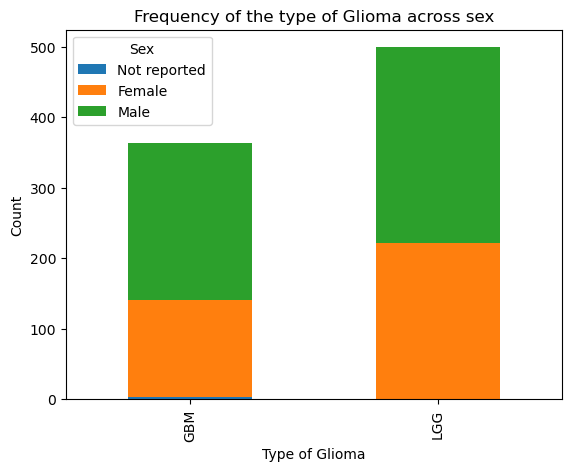

In [323]:
count_data = df.groupby([(data2[:, 0]), (data2[:, 3])]).size().unstack()

ax = count_data.plot(kind='bar', stacked=True)

# Making pretty
plt.xlabel('Type of Glioma')
plt.ylabel('Count')
plt.title('Frequency of the type of Glioma across sex')

race_legend = ['Not reported', 'Female', 'Male']
ax.legend(race_legend, title='Sex')


# Display the plot
plt.show()

###### something to be said here about severely lacking data across races

##### should do some sort of analysis here to see what's happening